## Exercise 5 | Regularized Linear Regression and Bias-Variance
### =========== Part 1: Loading and Visualizing Data =============

Loading and Visualizing Data ...


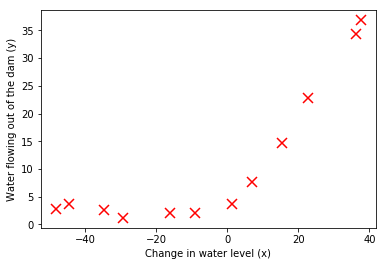

In [1]:
from ex5 import *
from scipy import io as sio
# Load Training Data
print('Loading and Visualizing Data ...')

# Load from ex5data1: 
# You will have X, y, Xval, yval, Xtest, ytest in your environment
data = sio.loadmat ('ex5data1.mat')
X = data['X'].reshape(-1)
y = data['y'].reshape(-1)
Xval = data['Xval'].reshape(-1)
yval = data['yval'].reshape(-1)
Xtest = data['Xtest'].reshape(-1)
ytest = data['ytest'].reshape(-1)

# m = Number of examples
m = X.shape[0]

# Plot training data
%matplotlib inline
plt.plot(X, y, 'rx', markersize=10, markeredgewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

### =========== Part 2: Regularized Linear Regression Cost =============

In [2]:
theta = np.array([1, 1])
J, _ = linearRegCostFunction(np.column_stack([np.ones(m), X]), y, theta, 1)

print(f'Cost at theta = [1 ; 1]: {J:f} '
         '\n(this value should be about 303.993192)')

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


### =========== Part 3: Regularized Linear Regression Gradient =============

In [3]:
theta = np.array([1, 1])
J, grad = linearRegCostFunction(np.column_stack([np.ones(m), X]), y, theta, 1)

print(f'Gradient at theta = [1 ; 1]:  [{grad[0]:f}; {grad[1]:f}] '
         '\n(this value should be about [-15.303016; 598.250744])')

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


### =========== Part 4: Train Linear Regression =============

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5


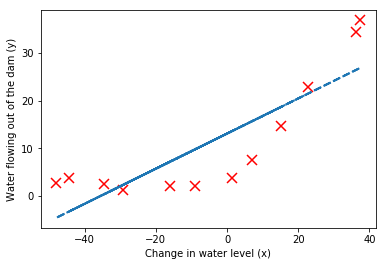

In [4]:
#  Train linear regression with lambda = 0
lambda_ = 0;
theta = trainLinearReg(np.column_stack([np.ones(m), X]), y, lambda_)

#  Plot fit over the data
plt.plot(X, y, 'rx', markersize=10, markeredgewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.matmul(np.column_stack([np.ones(m), X]), theta), '--', linewidth=2)
plt.show()

### =========== Part 5: Learning Curve for Linear Regression =============

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 22
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 22
         Function evaluations: 34
        

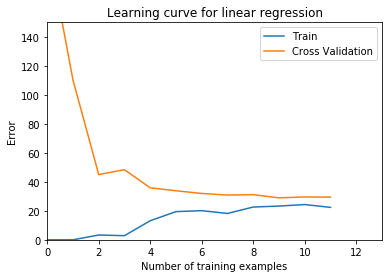

In [5]:
lambda_ = 0
error_train, error_val = learningCurve(np.column_stack([np.ones(m), X]), y,
                                       np.column_stack([np.ones_like(Xval), Xval]), yval, lambda_)

plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m), error_val)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print(f'  \t{i}\t\t{error_train[i]:f}\t{error_val[i]:f}')

### =========== Part 6: Feature Mapping for Polynomial Regression =============

In [6]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.insert(X_poly, 0, 1, axis=1)      # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.insert(X_poly_test, 0, 1, axis=1)  # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.insert(X_poly_val, 0, 1, axis=1)  # Add Ones

print('Normalized Training Example 1:')
print(f'  {X_poly[0, :]}  ')

Normalized Training Example 1:
  [ 1.       -0.378244 -0.788662  0.190329 -0.737591  0.320252 -0.617152
  0.359835 -0.531091]  


### =========== Part 7: Learning Curve for Polynomial Regression =============

         Current function value: 0.119425
         Iterations: 200
         Function evaluations: 372
         Gradient evaluations: 372


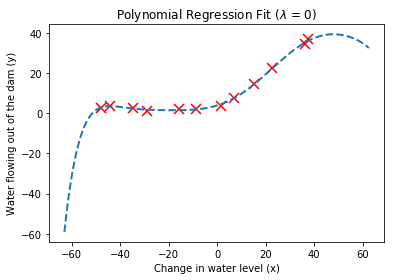

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 72
         

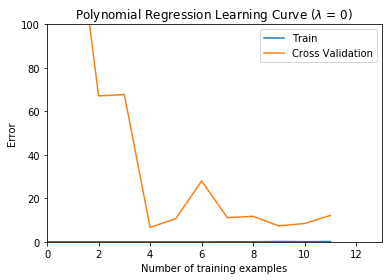

In [7]:
lambda_ = 0;
theta = trainLinearReg(X_poly, y, lambda_)

# Plot training data and fit
plt.figure()
plt.plot(X, y, 'rx', markersize=10, markeredgewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p);
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title(f'Polynomial Regression Fit ($\lambda$ = {lambda_:g})')
plt.show()

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m), error_val)

plt.title(f'Polynomial Regression Learning Curve ($\lambda$ = {lambda_:g})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print(f'Polynomial Regression (lambda = {lambda_:g})\n')
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print(f'  \t{i}\t\t{error_train[i]:f}\t{error_val[i]:f}')

### =========== Part 8: Validation for Selecting Lambda =============

         Current function value: 0.119425
         Iterations: 200
         Function evaluations: 372
         Gradient evaluations: 372
         Current function value: 0.180723
         Iterations: 200
         Function evaluations: 370
         Gradient evaluations: 370
Optimization terminated successfully.
         Current function value: 0.243172
         Iterations: 195
         Function evaluations: 377
         Gradient evaluations: 377
         Current function value: 0.371283
         Iterations: 200
         Function evaluations: 377
         Gradient evaluations: 377
Optimization terminated successfully.
         Current function value: 0.636703
         Iterations: 118
         Function evaluations: 218
         Gradient evaluations: 218
Optimization terminated successfully.
         Current function value: 1.360572
         Iterations: 78
         Function evaluations: 146
         Gradient evaluations: 146
Optimization terminated successfully.
         Current function v

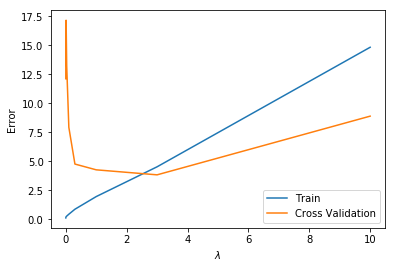

In [8]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train)
plt.plot(lambda_vec, error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('$\lambda$')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(f' {lambda_vec[i]:f}\t{error_train[i]:f}\t{error_val[i]:f}')

### Computing test set error
可以看到，当$\lambda = 3$时验证集误差最小

In [9]:
lambda_ = 3
theta = trainLinearReg(X_poly, y, lambda_)
error_test = linearRegCostFunction(X_poly_test, ytest, theta, 0)[0]
print(f'Error at lambda = 3:  {error_test:f} '
         '\n(this value should be about 3.8599)')

Optimization terminated successfully.
         Current function value: 14.937646
         Iterations: 13
         Function evaluations: 24
         Gradient evaluations: 24
Error at lambda = 3:  3.572027 
(this value should be about 3.8599)


### Plotting learning curves with randomly selected examples
比较复杂，关掉迭代过程显示，重新写一遍

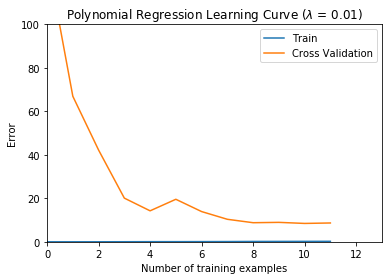

In [10]:
lambda_ = 0.01
repeat = 50

m = X_poly.shape[0]
error_train = np.zeros(m)
error_val = np.zeros(m)

for i in range(m):
    # Initialize Theta
    initial_theta = np.zeros(X_poly.shape[1])

    # Create "short hand" for the cost function to be minimized
    costFunction = lambda t, X, y: linearRegCostFunction(X, y, t, lambda_)[0]
    gradFunction = lambda t, X, y: linearRegCostFunction(X, y, t, lambda_)[1]

    # Now, costFunction is a function that takes in only one argument
    options = {'maxiter': 200, 'disp': False}
    error_train_temp = 0
    error_val_temp = 0
    
    for j in range(repeat):
        random_i = np.random.permutation(m)[:i + 1]
        # Minimize using fmincg
        res = opt.minimize(costFunction, initial_theta, args=(X_poly[random_i], y[random_i]), method='CG', jac=gradFunction, options=options)
        theta = res.x
        error_train_temp += linearRegCostFunction(X_poly[random_i], y[random_i], theta, 0)[0]
        error_val_temp += linearRegCostFunction(X_poly_val[random_i], yval[random_i], theta, 0)[0]
    
    error_train[i] = error_train_temp / repeat
    error_val[i] = error_val_temp / repeat
    
plt.plot(np.arange(m), error_train)
plt.plot(np.arange(m), error_val)

plt.title(f'Polynomial Regression Learning Curve ($\lambda$ = {lambda_:g})')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])
plt.show()

用了随机采样平均值之后曲线平滑了不少。
###### 以上部分代码在[ex5.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex5/ex5.py)中

### 总结：直观感受了偏差和方差的情况，以及对后续工作有了大概的印象。了解了`numpy`的广播原理。